In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

import sys
sys.path.append('C:/Users/jkahn/Documents/Schmidt/cfl')

from visualization_helpers import create_col_and_color_lists
from cfl.experiment import Experiment 

# Running CFL on the Data 

In [4]:
# load data 
data_id = 'questionnaire_36' # this data ID indicates the CFL setup with all questionnaire responses at week 0 for the X data and questionnaire data at week 36 for the Y data

X = np.load('X_' +'questionnaire_0'+ '.npy')
Y = np.load('Y_' + data_id+ '.npy')

which_week = data_id.split("_")[-1] # this should be "36"

In [5]:
print("X data shape: ", X.shape)
print("X data head: \n", X[:5])

print("Y data shape: ", Y.shape)
print("Y data head:\n", Y[:5])

X data shape:  (170, 83)
X data head: 
 [[1 1 2 0 1 1 1 1 2 1 2 1 0 1 2 1 1 2 0 0 1 0 1 2 1 2 1 1 0 0 1 2 0 1 2 2
  0 2 2 2 0 2 2 2 0 2 1 2 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 0 2 1 0 1 2 0 1
  1 0 1 1 0 1 0 0 0 0 0]
 [2 1 1 1 2 0 2 1 2 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 2 0 1 1 0 2 2 1 2 0 2 1
  0 2 0 2 0 1 2 1 0 2 2 0 2 0 2 2 0 0 2 0 2 2 2 1 2 1 0 0 2 1 0 0 0 0 0 1
  0 0 0 0 0 1 0 0 0 0 0]
 [2 1 2 0 2 1 2 2 2 2 2 1 1 2 1 1 1 1 0 1 2 2 2 1 1 1 0 0 2 2 2 2 0 2 2 1
  0 1 2 1 2 2 1 2 1 2 2 1 2 1 2 0 2 2 0 0 1 2 1 1 1 0 1 0 0 2 1 0 1 0 0 1
  2 1 0 0 2 1 0 0 0 0 0]
 [2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 2 2 1 1 1 1 2
  0 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 0 2 2 2 1 1 1 2 2 0 2 2 1 1 2 1 2
  0 0 0 0 0 0 0 0 0 0 0]
 [2 2 1 1 1 1 0 2 1 2 1 2 1 2 1 2 1 0 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2
  2 1 2 2 2 1 2 1 2 1 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2 1 1 1 2 2 1 2 1 1 2
  1 0 0 0 0 1 0 0 0 0 0]]
Y data shape:  (170, 83)
Y data head:
 [[1 1 2 0 1 0 1 1 1 1 2 2 0 1 0 0 0 1 0 1 2 0 1 1 1 1 1

In [6]:
# the parameters should be passed in dictionary form
data_info = {'X_dims' : X.shape,
             'Y_dims' : Y.shape,
             'Y_type' : 'categorical' #options: 'categorical' or 'continuous'
            }

# pass in empty parameter dictionaries to use the default parameter values (not
# allowed for data_info)
cde_params = {  'dense_units' : [100, 20, data_info['Y_dims'][1]], # model creation parameters
                'activations' : ['relu', 'linear', 'linear'],
                'dropouts'    : [0.2, 0, 0],

                'batch_size'  : 32, # parameters for training
                'n_epochs'    : 50,
                'optimizer'   : 'adam',
                'opt_config'  : {},
                'loss'        : 'mean_squared_error',
                'best'        : True,

                'verbose'     : 0, # amount of output to print
                'show_plot'   : True,
            }

cluster_params = {'x_model': KMeans(n_clusters=5), 'y_model': KMeans(n_clusters=5)}

# steps of this CFL pipeline
block_names = ['CondExpMod', 'Clusterer']
block_params = [cde_params, cluster_params]

# folder to save results to
save_path = 'initial_test'

# create the experiment!
my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, block_names=block_names, block_params=block_params, results_path=save_path)

All results from this run will be saved to initial_test\experiment0003
verbose specified but not used by this block type


In [7]:
print(my_exp.blocks[0].model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8400      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 83)                1743      
_________________________________________________________________
dropout_2 (Dropout)          (None, 83)                0         
Total params: 12,163
Trainable params: 12,163
Non-trainable params: 0
____________________________________________________

Training CFL pipeline.


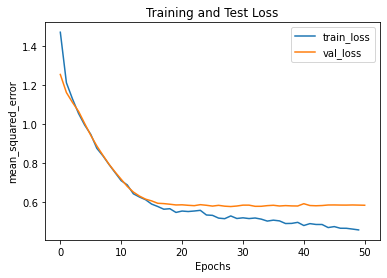

In [8]:
results = my_exp.train()

In [9]:
pyx = results['CondExpMod']['pyx']
pyx[0]

array([ 0.61033636,  0.314963  ,  0.6360624 ,  0.4056211 ,  0.84270096,
        0.23092015,  0.7625845 ,  0.46086904,  0.7943267 ,  0.60419166,
        1.2840279 ,  0.82797605,  0.31224784,  0.38817966,  0.42133868,
        0.39336142,  0.44375968,  0.37023976,  0.32677403,  0.7244196 ,
        0.54891306,  0.67566216,  0.49690428,  0.49404982,  1.0446833 ,
        0.44903687,  0.9120305 ,  0.48585916,  0.651668  ,  0.70483935,
        0.54076695,  0.82075036,  0.468775  ,  0.95257926,  0.5645374 ,
        0.76879704,  0.651384  ,  0.88684976,  0.7989174 ,  0.97044843,
        0.3912807 ,  1.123848  ,  1.4293413 ,  0.8129476 ,  1.0214742 ,
        0.6250046 ,  1.0440333 ,  0.5176563 ,  1.2136964 ,  1.1672641 ,
        1.1633902 ,  0.8734888 ,  0.69240195,  0.8453871 ,  0.5394841 ,
        0.7026695 ,  1.0071212 ,  0.5668274 ,  0.81794775,  0.48296425,
        0.43517885,  0.19753952,  0.15809362,  0.4666197 ,  0.16783437,
        0.44574445,  0.54045576,  0.106361  ,  0.36584243,  0.41

In [10]:
x_lbls = results['Clusterer']['x_lbls']

## CDE Diagnostic: Comparing the CDE prediction of effect distribution with actual distribution

Text(0.5, 1.0, 'Difference between actual and expected values')

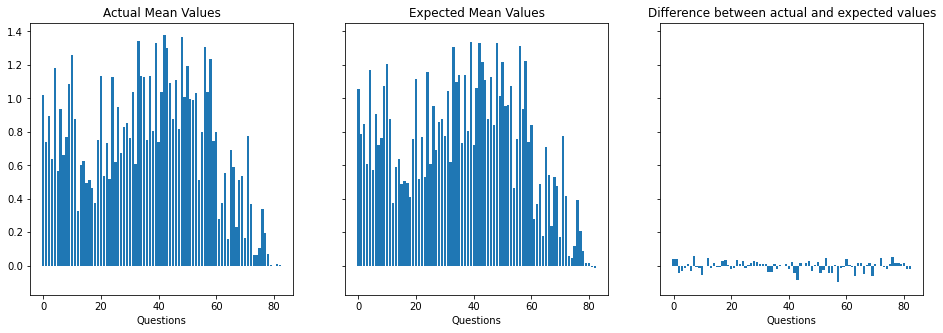

In [11]:
fig, axes = plt.subplots(nrows= 1, ncols=3, figsize=(16, 5), sharey=True)
    
for ax, values in zip(axes, (Y, pyx)):
    # get the global average for each questionnaire 
    mean_values = values.mean(axis=0)

    # then add the values to a bar chart 
    ax.bar(range(len(mean_values)), mean_values) 
    ax.set_xlabel("Questions")

    
actual_mean_values = Y.mean(axis=0)
expected_mean_values = pyx.mean(axis=0)

# then add the values to a bar chart 
axes[2].bar(range(len(actual_mean_values)), expected_mean_values - actual_mean_values) 
axes[2].set_xlabel("Questions")

axes[0].set_title("Actual Mean Values")
axes[1].set_title("Expected Mean Values")
axes[2].set_title("Difference between actual and expected values")

In [12]:
# idea: ^ same plots graphed by macro state 

In [13]:
x_lbls = results['Clusterer']['x_lbls']
print("X Macrovariables")
print("---------------------")
for x_macro_class in np.unique(x_lbls): 
    print("the number of samples in macrovariable class {} is {}".format(x_macro_class, np.sum(x_lbls==x_macro_class)))

y_lbls = results['Clusterer']['y_lbls']
print("\nY Macrovariables")
print("---------------------")
for y_macro_class in np.unique(y_lbls): 
    print("the number of samples in macrovariable class {} is {}".format(y_macro_class, np.sum(y_lbls==y_macro_class)))

X Macrovariables
---------------------
the number of samples in macrovariable class 0 is 49
the number of samples in macrovariable class 1 is 50
the number of samples in macrovariable class 2 is 13
the number of samples in macrovariable class 3 is 33
the number of samples in macrovariable class 4 is 25

Y Macrovariables
---------------------
the number of samples in macrovariable class 0 is 40
the number of samples in macrovariable class 1 is 31
the number of samples in macrovariable class 2 is 37
the number of samples in macrovariable class 3 is 23
the number of samples in macrovariable class 4 is 39


## Plots to Interpret Results 


- want to see in our states how madison's factors fit in (highlight madison's factors in the full graph somehow) 


In [14]:
Y[np.where(x_lbls==0)].shape

(49, 83)

In [15]:
# load the full, original data set for the visualization below
path_to_folder = os.path.join('IMPACT_CausalFeatureLearning', 'Data')
full_data = pd.read_csv(os.path.join(path_to_folder, 'data_w0_36.csv'), engine='python')



Text(0.5, 0.98, 'Global-mean-adjusted Questionnaire Scores')

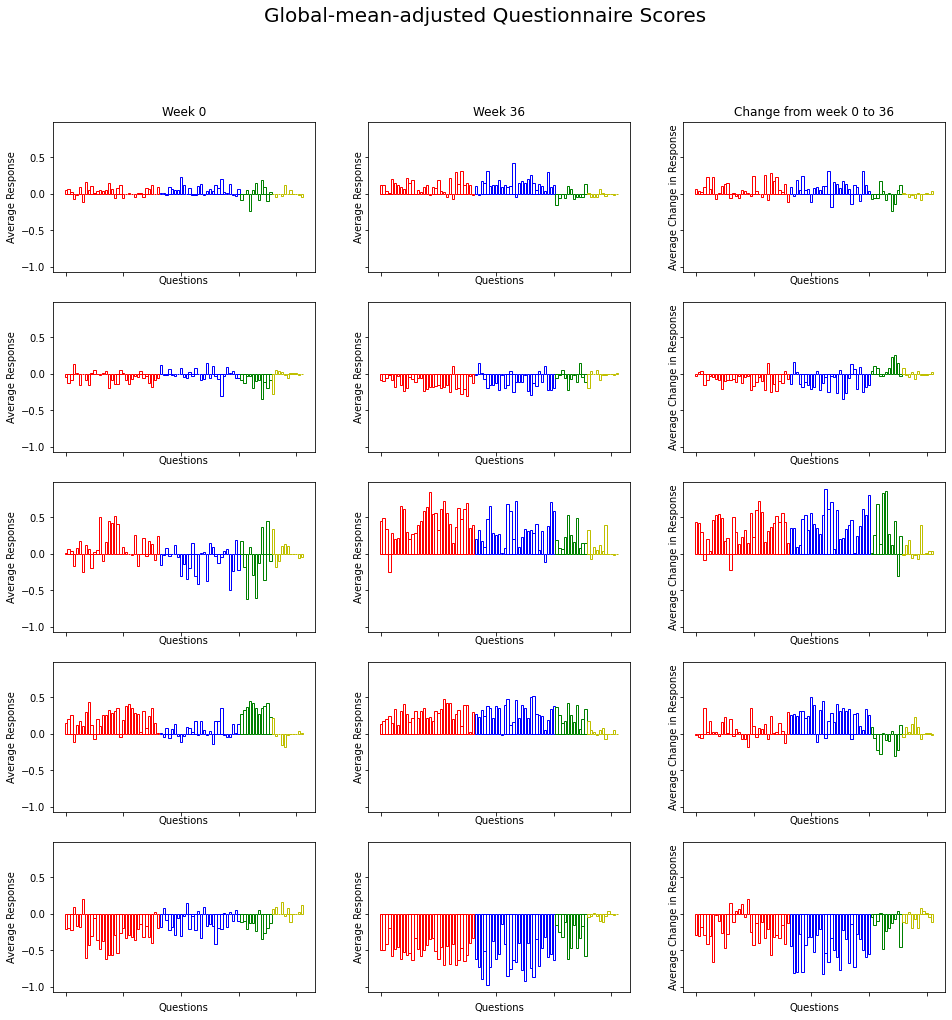

In [16]:
n_clusters = len(np.unique(x_lbls))
fig, axes = plt.subplots(nrows= n_clusters, ncols=3, figsize=(16, 16), sharex=True, sharey=True)

_, colors_by_col = create_col_and_color_lists(full_data, ['mf', 'rc', 'lo', 'bc'])


# for each macrovariable class: 
for i, ax_row in zip(range(n_clusters), axes): 
    
    # from left to right, subplots are X (week 0 data), Y (week 36 data), and change from 0 to 36 
    for data, ax in zip([X, Y, Y - X], ax_row): 
        # get the global average change for each question 
        global_mean = data.mean(axis=0)

        # get the mean for that macrovariable
        current_macrovar_mean = data[np.where(x_lbls==i)].mean(axis=0)

        #subtract the global mean from the mean for the macrovariable 
        global_adj_macrovar_mean = current_macrovar_mean - global_mean
        
        # then add the values to a bar chart 
        ax.bar(range(Y.shape[1]), global_adj_macrovar_mean, edgecolor=colors_by_col, color="None")
         

        # add axis labels 
        ax.set_xlabel("Questions")
        ax.set_ylabel("Average Response")

        # hide axis tick labels
        ax.set_xticklabels(labels=[]) 

    # make last one represent change
    ax_row[2].set_ylabel("Average Change in Response")


axes[0][0].set_title("Week 0")
axes[0][1].set_title("Week 36")
axes[0][2].set_title("Change from week 0 to 36")
fig.suptitle("Global-mean-adjusted Questionnaire Scores", fontsize=20)

In [17]:
# taken from Aitken paper 
melancholic_features = ['mf2c', 'mf5c', 'mf6c', 'mf10c', 'mf12c', 'mf13c', 'mf21c', 'mf29c']
depressive_cognititons = ['mf16c', 'mf17c', 'mf18c', 'mf19c', 'mf28c']
anxiety =  ['mf31c', 'rc2c', 'rc3c', 'rc6c', 'rc9c', 'rc17c', 'rc21c',
'rc22c', 'rc26c', 'rc28c']
oc = ['lo1c', 'lo3c', 'lo4c', 'lo6c', 'lo7c', 'lo9c', 'lo10c']
antisocial = [ 'bc1c', 'bc2c', 'bc3c', 'bc4c', 'bc5c', 'bc7c', 'bc10c']
aitken_factors = melancholic_features + depressive_cognititons + anxiety + oc + antisocial


avgs_df = create_X_avgs_df(full_data, x_lbls, aitken_factors)

colors_by_col = ['c'] * len(melancholic_features) + ['m'] * len(depressive_cognititons) +  ['y'] * len(anxiety) + ['g']*len(oc) + ['r']*len(antisocial)

create_cfl_data_plot(avgs_df, Y, x_lbls, aitken_factors, colors_by_col,  "Change from Week 0 to week {} by macrovariable class \nAitken factors only".format(which_week))

NameError: name 'create_X_avgs_df' is not defined

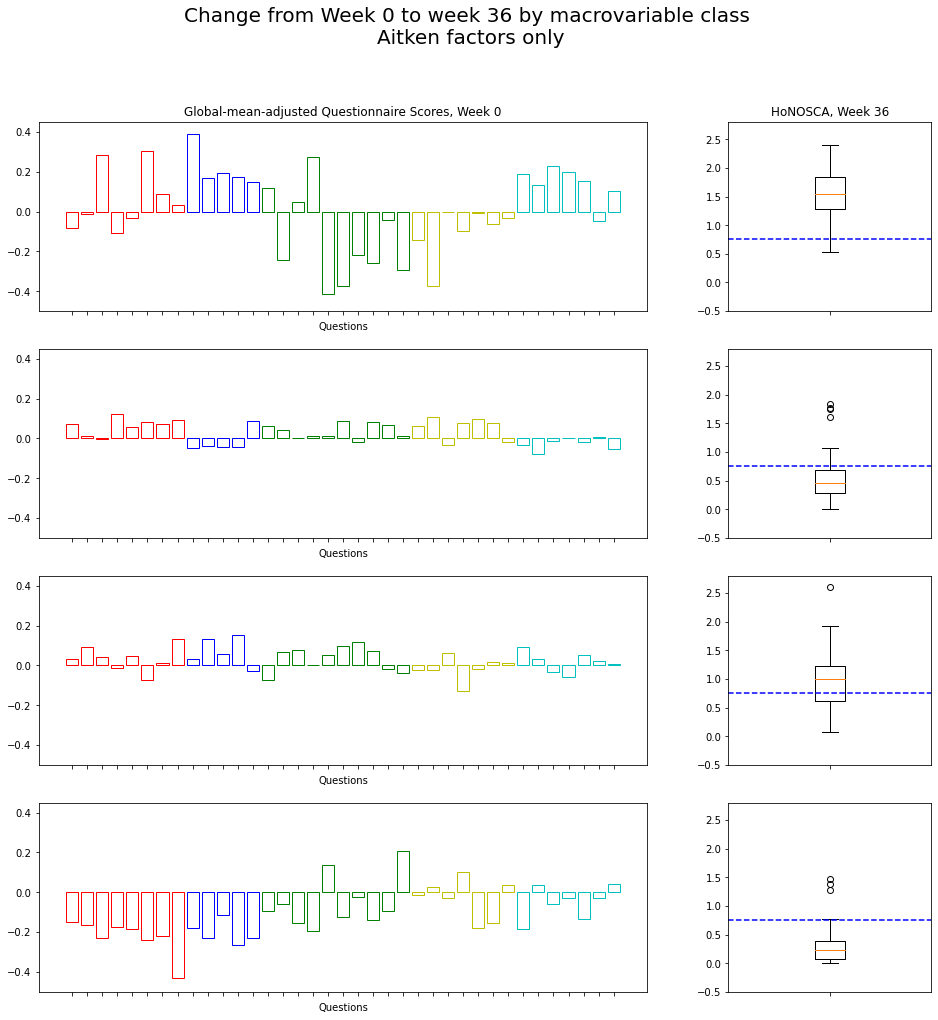

Idea: just run CFL on the questions used for the factors 

other thing to check against paper: what (if any) of other information was useful (treatment, sex, location, etc)
- try making a correlation with <vector of everything up until hoNOSCA> and <hoNOSCA> 
^ if sex, etc., has a huge effect, we might see that in this preliminary check 